## Trabajo Práctico Algoritmos Evolutivos I: _Evaluación de Particle Swarm Optimization como técnica de optimización de hiperparámetros en distintos modelos de Machine Learning_
### Maestría en Inteligencia Artificial
### Alumna: Trinidad Monreal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pso import PSOOptimizer
from models import KNNWrapper, DecisionTreeWrapper, MLPWrapper
from datasets import get_dataset_wine, get_dataset_digits, get_dataset_synthetic_multiclass

plt.style.use("default")  

Creo 3 datasets de prueba

In [ ]:
datasets = [get_dataset_synthetic_multiclass(),  get_dataset_wine(), get_dataset_digits()]

for X, y, name in datasets:
    print(f"{name}: X shape = {X.shape}, y shape = {y.shape}")


synthetic_4class: X shape = (2000, 20), y shape = (2000,)
wine: X shape = (178, 13), y shape = (178,)
digits: X shape = (1797, 64), y shape = (1797,)


Registro los 3 modelos de ML a testear

In [ ]:
models = [(KNNWrapper, "kNN"), (DecisionTreeWrapper, "DecisionTree"), (MLPWrapper, "MLP")]

for cls, name in models:
    print("Modelo registrado:", name)

Modelo registrado: kNN
Modelo registrado: DecisionTree
Modelo registrado: MLP


Función para correr un experimento 

In [ ]:
from sklearn.model_selection import cross_val_score

def run_single_experiment(model_wrapper_cls, X, y, model_name, dataset_name, alpha_complexity=0.0, pso_config=None, random_state=0, plot_convergence=True):
    """
    Una corrida de PSO para un modelo y dataset en particular.
    Devuelve dict con info del mejor resultado y la historia de convergencia.
    """
    if pso_config is None:
        pso_config = dict(num_particles=15, max_iter=25, w=0.7, c1=1.5, c2=1.5, random_state=random_state)

    wrapper = model_wrapper_cls(X=X, y=y, alpha_complexity=alpha_complexity, cv=5, random_state=random_state )

    bounds = wrapper.param_bounds

    def objective_fn(x):
        return wrapper.evaluate(x)

    optimizer = PSOOptimizer(**pso_config)
    best_pos, best_fit, history = optimizer.optimize(objective_fn, bounds)

    # Recalcular accuracy sin penalización (sólo para reportar)
    params = wrapper.decode(best_pos)
    model = wrapper.build_model(params)
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy", n_jobs=-1)
    best_acc = scores.mean()

    if plot_convergence:
        plt.figure(figsize=(6, 4))
        plt.plot(history, marker="o")
        plt.xlabel("Iteración")
        plt.ylabel("Mejor fitness global")
        plt.title(f"Convergencia - {model_name} en {dataset_name}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    result = {
        "model_name": model_name,
        "dataset_name": dataset_name,
        "best_params": params,
        "best_fitness": best_fit,
        "best_accuracy": best_acc,
        "history": history,
    }
    return result


Corro una ejecución por combinacion de modelo y dataset:
- kNN en los 3 datastes
- MLP en los 3 datasets
- Árbol de decisión en los 3 datasets

=== kNN en synthetic_4class ===
[PSO] Iter 1/25 - Best fitness: 0.2522 - Best global position: [12.94638452  1.40196228  0.51483036]
[PSO] Iter 1/25 - Best fitness: 0.2522 - Best global position: [12.94638452  1.40196228  0.51483036]
[PSO] Iter 2/25 - Best fitness: 0.2522 - Best global position: [12.94638452  1.40196228  0.51483036]
[PSO] Iter 2/25 - Best fitness: 0.2522 - Best global position: [12.94638452  1.40196228  0.51483036]
[PSO] Iter 3/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 3/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 4/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 4/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 5/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 6/25 - Best fitness: 0.2447 - Best global position: [8.09334564

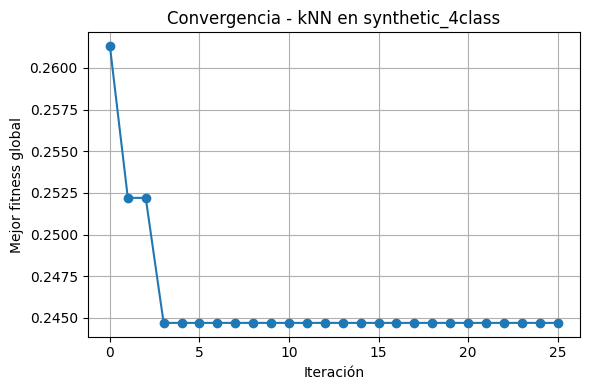

=== DecisionTree en synthetic_4class ===
[PSO] Iter 1/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 1/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 2/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 2/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 3/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 3/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 4/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 4/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 5/25 - Best fitness: 0.4455 - Best global po

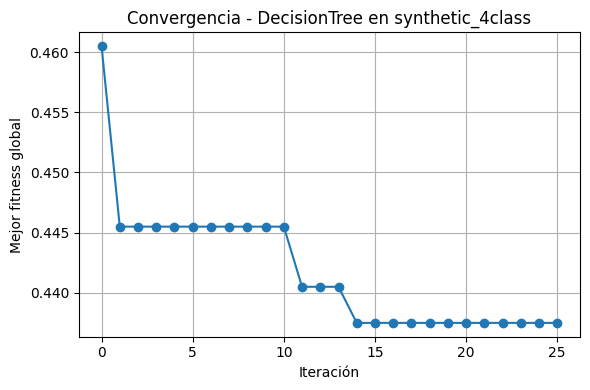

=== MLP en synthetic_4class ===


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.2374 - Best global position: [66.7866641  -3.97521185 -1.81970503]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 2/25 - Best fitness: 0.2315 - Best global position: [70.17299312 -4.07395076 -2.03825496]
[PSO] Iter 3/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 3/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 4/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 4/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 5/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 5/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 6/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 6/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 7/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.

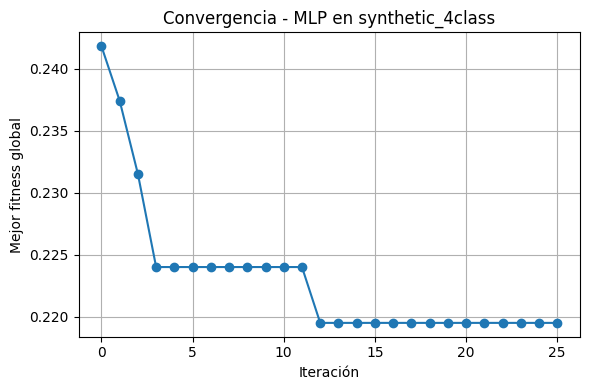

=== kNN en wine ===
[PSO] Iter 1/25 - Best fitness: 0.2198 - Best global position: [3.14638452 1.30857898 0.68304895]
[PSO] Iter 2/25 - Best fitness: 0.1914 - Best global position: [2.24707664 1.35623886 0.62690935]
[PSO] Iter 1/25 - Best fitness: 0.2198 - Best global position: [3.14638452 1.30857898 0.68304895]
[PSO] Iter 2/25 - Best fitness: 0.1914 - Best global position: [2.24707664 1.35623886 0.62690935]
[PSO] Iter 3/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 4/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 3/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 4/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 5/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 5/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]


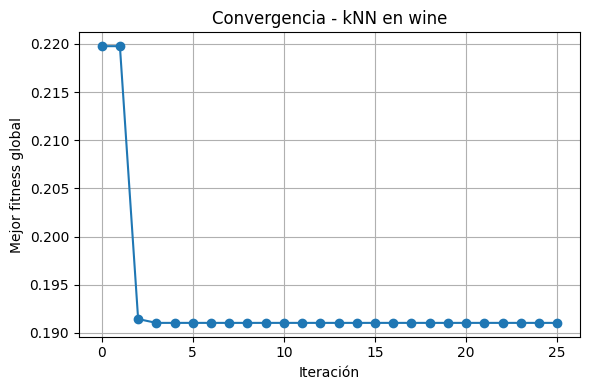

=== DecisionTree en wine ===
[PSO] Iter 1/25 - Best fitness: 0.0713 - Best global position: [ 9.71939974 29.29957741  3.65614296  0.29162406]
[PSO] Iter 2/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 1/25 - Best fitness: 0.0713 - Best global position: [ 9.71939974 29.29957741  3.65614296  0.29162406]
[PSO] Iter 2/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 3/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 4/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 3/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 4/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 5/25 - Best fitness: 0.0693 - Best global position: [ 7.

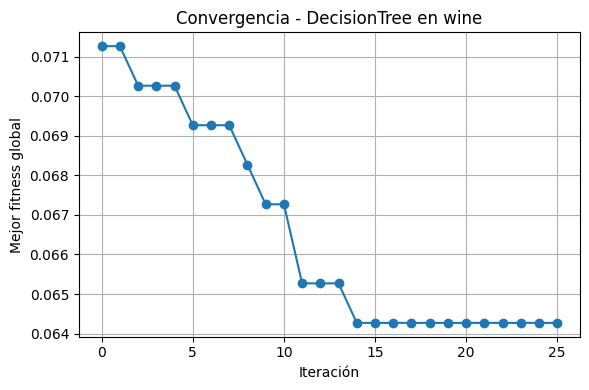

=== MLP en wine ===
[PSO] Iter 1/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 1/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 2/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 2/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 3/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 3/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 4/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 4/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 5/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 5/25 - Best fitness: 0.1931 - Best global position: [72.2300

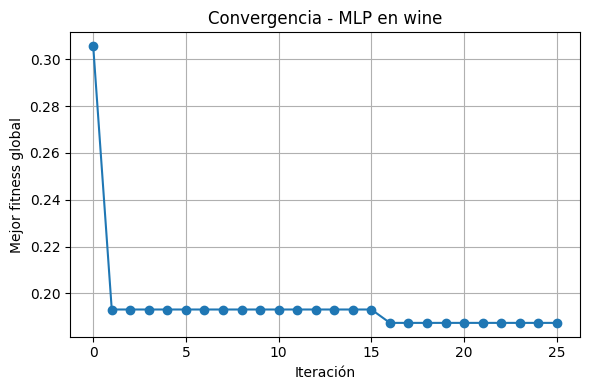

=== kNN en digits ===
[PSO] Iter 1/25 - Best fitness: 0.0420 - Best global position: [8.57177244 2.54139605 0.69312112]
[PSO] Iter 1/25 - Best fitness: 0.0420 - Best global position: [8.57177244 2.54139605 0.69312112]
[PSO] Iter 2/25 - Best fitness: 0.0346 - Best global position: [2.94364854 2.16482621 0.43541699]
[PSO] Iter 2/25 - Best fitness: 0.0346 - Best global position: [2.94364854 2.16482621 0.43541699]
[PSO] Iter 3/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 3/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 4/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 4/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 5/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 5/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412

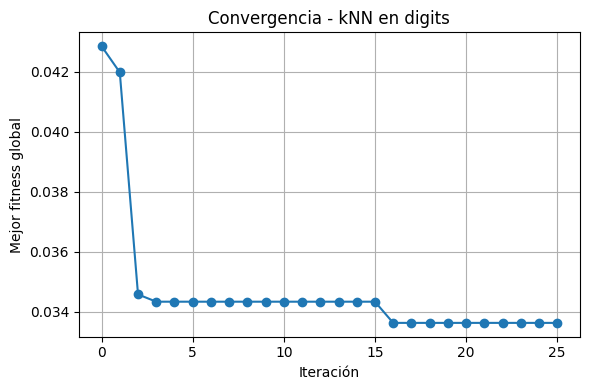

=== DecisionTree en digits ===
[PSO] Iter 1/25 - Best fitness: 0.2577 - Best global position: [ 9.30588646 41.96855341 14.30503694  0.44989331]
[PSO] Iter 1/25 - Best fitness: 0.2577 - Best global position: [ 9.30588646 41.96855341 14.30503694  0.44989331]
[PSO] Iter 2/25 - Best fitness: 0.2577 - Best global position: [ 9.30588646 41.96855341 14.30503694  0.44989331]
[PSO] Iter 2/25 - Best fitness: 0.2577 - Best global position: [ 9.30588646 41.96855341 14.30503694  0.44989331]
[PSO] Iter 3/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 3/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 4/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 4/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 5/25 - Best fitness: 0.2500 - Best global position: [ 

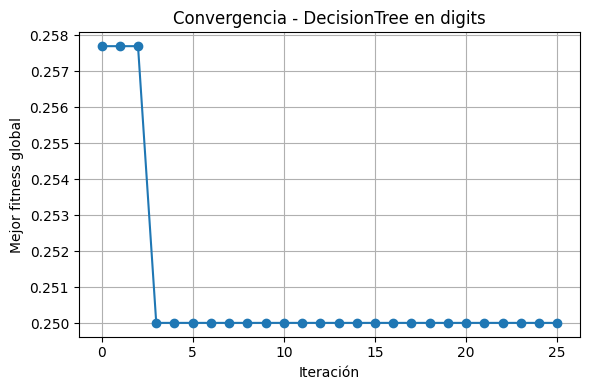

=== MLP en digits ===


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 2/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 2/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 3/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 3/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 4/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 4/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 5/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 5/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 6/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.

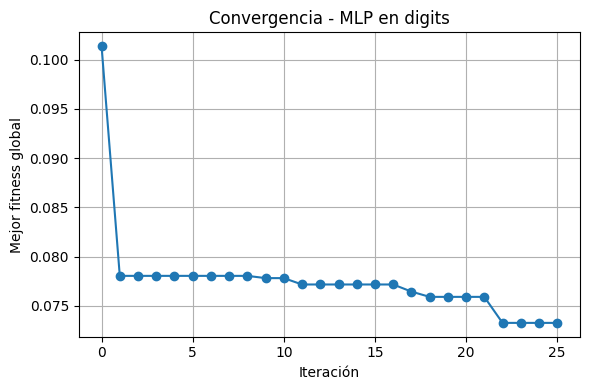

,Dataset,Modelo,BestAccuracy,BestFitness
7,digits,DecisionTree,0.757993,0.250007
8,digits,MLP,0.937126,0.073274
6,digits,kNN,0.967171,0.033629
1,synthetic_4class,DecisionTree,0.573500,0.437500
2,synthetic_4class,MLP,0.794500,0.219500
0,synthetic_4class,kNN,0.758500,0.244700
4,wine,DecisionTree,0.938730,0.064270
5,wine,MLP,0.826984,0.187416
3,wine,kNN,0.809365,0.191035


In [ ]:
alpha_complexity = 0.02  # penalización de complejidad
results_single = []

for (X, y, ds_name) in datasets:
    for model_cls, model_name in models:
        print(f"=== {model_name} en {ds_name} ===")
        res = run_single_experiment(model_wrapper_cls=model_cls, X=X, y=y, model_name=model_name, dataset_name=ds_name, alpha_complexity=alpha_complexity,
                                    pso_config=dict(num_particles=15, max_iter=25, w=0.7, c1=1.5, c2=1.5, random_state=42),
                                    random_state=42,
                                    plot_convergence=True
                                    )
        results_single.append(res)

rows = []
for r in results_single:
    rows.append({
        "Dataset": r["dataset_name"],
        "Modelo": r["model_name"],
        "BestAccuracy": r["best_accuracy"],
        "BestFitness": r["best_fitness"],
    })

df_summary_single = pd.DataFrame(rows)
df_summary_single.sort_values(["Dataset", "Modelo"], inplace=True)
df_summary_single

Sigo por correr varias ejecuciones de PSO por combinación para ver variabilidad y dibujar boxplots

In [ ]:
N_RUNS = 5 
alpha_complexity = 0.02
all_runs = []  

for (X, y, ds_name) in datasets:
    for model_cls, model_name in models:
        print(f"\n### Múltiples runs: {model_name} en {ds_name} ###")
        for run_id in range(N_RUNS):
            seed = 100 + run_id  # o lo que quieras
            print(f"  Run {run_id+1}/{N_RUNS} (seed={seed})")
            res = run_single_experiment(model_wrapper_cls=model_cls, X=X, y=y, model_name=model_name, dataset_name=ds_name, alpha_complexity=alpha_complexity,
                                        pso_config=dict(num_particles=15, max_iter=25, w=0.7, c1=1.5, c2=1.5, random_state=seed),
                                        random_state=seed,
                                        plot_convergence=False
                                        )
            res["run_id"] = run_id
            all_runs.append(res)

rows = []
for r in all_runs:
    rows.append({
        "Dataset": r["dataset_name"],
        "Modelo": r["model_name"],
        "Run": r["run_id"],
        "BestAccuracy": r["best_accuracy"],
        "BestFitness": r["best_fitness"],
    })

df_all_runs = pd.DataFrame(rows)
df_all_runs.head()


### Múltiples runs: kNN en synthetic_4class ###
  Run 1/5 (seed=100)
[PSO] Iter 1/25 - Best fitness: 0.2515 - Best global position: [4.54755482 2.04824165 0.54655052]
[PSO] Iter 1/25 - Best fitness: 0.2515 - Best global position: [4.54755482 2.04824165 0.54655052]
[PSO] Iter 2/25 - Best fitness: 0.2508 - Best global position: [12.23438532  1.9681888   0.50114087]
[PSO] Iter 3/25 - Best fitness: 0.2460 - Best global position: [9.91618019 2.02814095 0.57184702]
[PSO] Iter 2/25 - Best fitness: 0.2508 - Best global position: [12.23438532  1.9681888   0.50114087]
[PSO] Iter 3/25 - Best fitness: 0.2460 - Best global position: [9.91618019 2.02814095 0.57184702]
[PSO] Iter 4/25 - Best fitness: 0.2448 - Best global position: [7.41837612 2.09497504 0.54601555]
[PSO] Iter 5/25 - Best fitness: 0.2447 - Best global position: [7.93077946 1.96835951 0.6939086 ]
[PSO] Iter 4/25 - Best fitness: 0.2448 - Best global position: [7.41837612 2.09497504 0.54601555]
[PSO] Iter 5/25 - Best fitness: 0.2447 - B

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.2217 - Best global position: [61.07500062  0.12750779 -1.97948291]
[PSO] Iter 2/25 - Best fitness: 0.2217 - Best global position: [61.07500062  0.12750779 -1.97948291]
[PSO] Iter 2/25 - Best fitness: 0.2217 - Best global position: [61.07500062  0.12750779 -1.97948291]
[PSO] Iter 3/25 - Best fitness: 0.2177 - Best global position: [60.77312122  0.06108692 -2.03062162]
[PSO] Iter 3/25 - Best fitness: 0.2177 - Best global position: [60.77312122  0.06108692 -2.03062162]
[PSO] Iter 4/25 - Best fitness: 0.2177 - Best global position: [60.77312122  0.06108692 -2.03062162]
[PSO] Iter 4/25 - Best fitness: 0.2177 - Best global position: [60.77312122  0.06108692 -2.03062162]
[PSO] Iter 5/25 - Best fitness: 0.2137 - Best global position: [ 6.13881733e+01  5.25355172e-02 -2.05138025e+00]
[PSO] Iter 5/25 - Best fitness: 0.2137 - Best global position: [ 6.13881733e+01  5.25355172e-02 -2.05138025e+00]
[PSO] Iter 6/25 - Best fitness: 0.2137 - Best global position: [61.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.2235 - Best global position: [84.89148863 -0.09107351 -1.99802372]
[PSO] Iter 2/25 - Best fitness: 0.2188 - Best global position: [ 6.43298114e+01 -5.42320156e-03 -1.84082801e+00]
[PSO] Iter 2/25 - Best fitness: 0.2188 - Best global position: [ 6.43298114e+01 -5.42320156e-03 -1.84082801e+00]
[PSO] Iter 3/25 - Best fitness: 0.2188 - Best global position: [ 6.43298114e+01 -5.42320156e-03 -1.84082801e+00]
[PSO] Iter 3/25 - Best fitness: 0.2188 - Best global position: [ 6.43298114e+01 -5.42320156e-03 -1.84082801e+00]
[PSO] Iter 4/25 - Best fitness: 0.2188 - Best global position: [ 6.43298114e+01 -5.42320156e-03 -1.84082801e+00]
[PSO] Iter 4/25 - Best fitness: 0.2188 - Best global position: [ 6.43298114e+01 -5.42320156e-03 -1.84082801e+00]
[PSO] Iter 5/25 - Best fitness: 0.2179 - Best global position: [67.15377781 -0.06834628 -1.95262028]
[PSO] Iter 5/25 - Best fitness: 0.2179 - Best global position: [67.15377781 -0.06834628 -1.95262028]
[PSO] Iter 6/25 - B

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 7/25 - Best fitness: 0.2179 - Best global position: [67.15377781 -0.06834628 -1.95262028]
[PSO] Iter 8/25 - Best fitness: 0.2170 - Best global position: [55.32503211  0.08120448 -1.948297  ]
[PSO] Iter 8/25 - Best fitness: 0.2170 - Best global position: [55.32503211  0.08120448 -1.948297  ]
[PSO] Iter 9/25 - Best fitness: 0.2170 - Best global position: [55.32503211  0.08120448 -1.948297  ]
[PSO] Iter 9/25 - Best fitness: 0.2170 - Best global position: [55.32503211  0.08120448 -1.948297  ]
[PSO] Iter 10/25 - Best fitness: 0.2093 - Best global position: [48.79830038  0.1544191  -1.92323066]
[PSO] Iter 10/25 - Best fitness: 0.2093 - Best global position: [48.79830038  0.1544191  -1.92323066]
[PSO] Iter 11/25 - Best fitness: 0.2093 - Best global position: [48.79830038  0.1544191  -1.92323066]
[PSO] Iter 11/25 - Best fitness: 0.2093 - Best global position: [48.79830038  0.1544191  -1.92323066]
[PSO] Iter 12/25 - Best fitness: 0.2093 - Best global position: [48.79830038  0.1544191

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.2422 - Best global position: [41.35406322 -0.73781655 -2.00834752]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 2/25 - Best fitness: 0.2240 - Best global position: [54.75547274  0.13218586 -1.89030933]
[PSO] Iter 3/25 - Best fitness: 0.2240 - Best global position: [54.75547274  0.13218586 -1.89030933]
[PSO] Iter 3/25 - Best fitness: 0.2240 - Best global position: [54.75547274  0.13218586 -1.89030933]
[PSO] Iter 4/25 - Best fitness: 0.2240 - Best global position: [54.75547274  0.13218586 -1.89030933]
[PSO] Iter 4/25 - Best fitness: 0.2240 - Best global position: [54.75547274  0.13218586 -1.89030933]
[PSO] Iter 5/25 - Best fitness: 0.2165 - Best global position: [ 5.48052594e+01  4.26678535e-02 -1.89490309e+00]
[PSO] Iter 5/25 - Best fitness: 0.2165 - Best global position: [ 5.48052594e+01  4.26678535e-02 -1.89490309e+00]
[PSO] Iter 6/25 - Best fitness: 0.2165 - Best global position: [ 5.48052594e+01  4.26678535e-02 -1.89490309e+00]
[PSO] Iter 6/25 - Best fitness: 0.2165 - Best global position: [ 5.48052594e+01  4.26678535e-02 -1.89490309e+00]
[PSO] Iter 7/25 - Best fitness: 0.2165 - Be

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 10/25 - Best fitness: 0.2165 - Best global position: [ 5.48052594e+01  4.26678535e-02 -1.89490309e+00]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 11/25 - Best fitness: 0.2165 - Best global position: [ 5.48052594e+01  4.26678535e-02 -1.89490309e+00]
[PSO] Iter 12/25 - Best fitness: 0.2128 - Best global position: [58.78824377  0.0916147  -1.90772406]
[PSO] Iter 12/25 - Best fitness: 0.2128 - Best global position: [58.78824377  0.0916147  -1.90772406]
[PSO] Iter 13/25 - Best fitness: 0.2128 - Best global position: [58.78824377  0.0916147  -1.90772406]
[PSO] Iter 13/25 - Best fitness: 0.2128 - Best global position: [58.78824377  0.0916147  -1.90772406]
[PSO] Iter 14/25 - Best fitness: 0.2128 - Best global position: [58.78824377  0.0916147  -1.90772406]
[PSO] Iter 14/25 - Best fitness: 0.2128 - Best global position: [58.78824377  0.0916147  -1.90772406]
[PSO] Iter 15/25 - Best fitness: 0.2128 - Best global position: [58.78824377  0.0916147  -1.90772406]
[PSO] Iter 15/25 - Best fitness: 0.2128 - Best global position: [58.78824377  0.0916147  -1.90772406]
[PSO] Iter 16/25 - Best fitness: 0.2098 - Best global position: [59.25

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 21/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
[PSO] Iter 22/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
[PSO] Iter 22/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
[PSO] Iter 23/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
[PSO] Iter 23/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
[PSO] Iter 24/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
[PSO] Iter 24/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
[PSO] Iter 25/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
  Run 4/5 (seed=103)
[PSO] Iter 25/25 - Best fitness: 0.2098 - Best global position: [59.25432531  0.13368391 -1.88844164]
  Run 4/5 (seed=103)


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.2358 - Best global position: [38.85906581 -1.46915649 -1.68096501]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 2/25 - Best fitness: 0.2260 - Best global position: [54.60103099 -1.79882867 -2.2110647 ]
[PSO] Iter 3/25 - Best fitness: 0.2260 - Best global position: [54.60103099 -1.79882867 -2.2110647 ]
[PSO] Iter 3/25 - Best fitness: 0.2260 - Best global position: [54.60103099 -1.79882867 -2.2110647 ]
[PSO] Iter 4/25 - Best fitness: 0.2260 - Best global position: [54.60103099 -1.79882867 -2.2110647 ]
[PSO] Iter 4/25 - Best fitness: 0.2260 - Best global position: [54.60103099 -1.79882867 -2.2110647 ]
[PSO] Iter 5/25 - Best fitness: 0.2260 - Best global position: [54.60103099 -1.79882867 -2.2110647 ]
[PSO] Iter 5/25 - Best fitness: 0.2260 - Best global position: [54.60103099 -1.79882867 -2.2110647 ]
[PSO] Iter 6/25 - Best fitness: 0.2257 - Best global position: [61.09029574 -1.0925167  -1.90421733]
[PSO] Iter 6/25 - Best fitness: 0.2257 - Best global position: [61.09029574 -1.0925167  -1.90421733]
[PSO] Iter 7/25 - Best fitness: 0.2257 - Best global position: [61.09029574 -1.0925167  -1.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 2/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 2/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 3/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 3/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 4/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 4/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 5/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 5/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.21683757]
[PSO] Iter 6/25 - Best fitness: 0.2289 - Best global position: [52.20569062 -1.67802113 -2.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.0778 - Best global position: [80.07500062  0.46203629 -1.93553666]
[PSO] Iter 2/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.88710021]
[PSO] Iter 2/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.88710021]
[PSO] Iter 3/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.88710021]
[PSO] Iter 3/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.88710021]
[PSO] Iter 4/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.88710021]
[PSO] Iter 4/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.88710021]
[PSO] Iter 5/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.88710021]
[PSO] Iter 5/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.88710021]
[PSO] Iter 6/25 - Best fitness: 0.0723 - Best global position: [47.08039922  0.05550866 -1.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.0766 - Best global position: [80.1683594  -1.58389832 -1.990229  ]
[PSO] Iter 2/25 - Best fitness: 0.0766 - Best global position: [80.1683594  -1.58389832 -1.990229  ]
[PSO] Iter 2/25 - Best fitness: 0.0766 - Best global position: [80.1683594  -1.58389832 -1.990229  ]
[PSO] Iter 3/25 - Best fitness: 0.0766 - Best global position: [80.1683594  -1.58389832 -1.990229  ]
[PSO] Iter 3/25 - Best fitness: 0.0766 - Best global position: [80.1683594  -1.58389832 -1.990229  ]
[PSO] Iter 4/25 - Best fitness: 0.0755 - Best global position: [79.87617352 -2.10493509 -2.03899782]
[PSO] Iter 4/25 - Best fitness: 0.0755 - Best global position: [79.87617352 -2.10493509 -2.03899782]
[PSO] Iter 5/25 - Best fitness: 0.0755 - Best global position: [79.87617352 -2.10493509 -2.03899782]
[PSO] Iter 5/25 - Best fitness: 0.0755 - Best global position: [79.87617352 -2.10493509 -2.03899782]
[PSO] Iter 6/25 - Best fitness: 0.0755 - Best global position: [79.87617352 -2.10493509 -2.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.0949 - Best global position: [34.79939108 -0.6531813  -1.91796782]
[PSO] Iter 2/25 - Best fitness: 0.0757 - Best global position: [49.96735813  0.52981988 -2.75965256]
[PSO] Iter 2/25 - Best fitness: 0.0757 - Best global position: [49.96735813  0.52981988 -2.75965256]
[PSO] Iter 3/25 - Best fitness: 0.0757 - Best global position: [49.96735813  0.52981988 -2.75965256]
[PSO] Iter 3/25 - Best fitness: 0.0757 - Best global position: [49.96735813  0.52981988 -2.75965256]
[PSO] Iter 4/25 - Best fitness: 0.0757 - Best global position: [49.96735813  0.52981988 -2.75965256]
[PSO] Iter 4/25 - Best fitness: 0.0757 - Best global position: [49.96735813  0.52981988 -2.75965256]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 5/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 6/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 6/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 7/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 7/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 8/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 8/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 9/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 9/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2.4149023 ]
[PSO] Iter 10/25 - Best fitness: 0.0729 - Best global position: [50.10374737  0.1398562  -2

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.0856 - Best global position: [46.6746003  -2.11156038 -1.78005057]
[PSO] Iter 2/25 - Best fitness: 0.0812 - Best global position: [39.29911021 -2.62195064 -2.07493316]
[PSO] Iter 2/25 - Best fitness: 0.0812 - Best global position: [39.29911021 -2.62195064 -2.07493316]
[PSO] Iter 3/25 - Best fitness: 0.0811 - Best global position: [68.89307877 -2.38357002 -1.71137102]
[PSO] Iter 3/25 - Best fitness: 0.0811 - Best global position: [68.89307877 -2.38357002 -1.71137102]
[PSO] Iter 4/25 - Best fitness: 0.0778 - Best global position: [57.57323596 -2.37754388 -1.88568582]
[PSO] Iter 4/25 - Best fitness: 0.0778 - Best global position: [57.57323596 -2.37754388 -1.88568582]
[PSO] Iter 5/25 - Best fitness: 0.0778 - Best global position: [57.57323596 -2.37754388 -1.88568582]
[PSO] Iter 5/25 - Best fitness: 0.0778 - Best global position: [57.57323596 -2.37754388 -1.88568582]
[PSO] Iter 6/25 - Best fitness: 0.0778 - Best global position: [57.57323596 -2.37754388 -1.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/25 - Best fitness: 0.0851 - Best global position: [74.84285635 -2.5226631  -2.06520589]
[PSO] Iter 2/25 - Best fitness: 0.0829 - Best global position: [47.41871394 -1.73720652 -1.76981161]
[PSO] Iter 2/25 - Best fitness: 0.0829 - Best global position: [47.41871394 -1.73720652 -1.76981161]
[PSO] Iter 3/25 - Best fitness: 0.0726 - Best global position: [45.63211064 -1.91587891 -2.18795705]
[PSO] Iter 3/25 - Best fitness: 0.0726 - Best global position: [45.63211064 -1.91587891 -2.18795705]
[PSO] Iter 4/25 - Best fitness: 0.0726 - Best global position: [45.63211064 -1.91587891 -2.18795705]
[PSO] Iter 4/25 - Best fitness: 0.0726 - Best global position: [45.63211064 -1.91587891 -2.18795705]
[PSO] Iter 5/25 - Best fitness: 0.0726 - Best global position: [45.63211064 -1.91587891 -2.18795705]
[PSO] Iter 5/25 - Best fitness: 0.0726 - Best global position: [45.63211064 -1.91587891 -2.18795705]
[PSO] Iter 6/25 - Best fitness: 0.0726 - Best global position: [45.63211064 -1.91587891 -2.

,Dataset,Modelo,Run,BestAccuracy,BestFitness
0,synthetic_4class,kNN,0,0.7585,0.2447
1,synthetic_4class,kNN,1,0.7585,0.2447
2,synthetic_4class,kNN,2,0.7585,0.2447
3,synthetic_4class,kNN,3,0.7585,0.2447
4,synthetic_4class,kNN,4,0.7585,0.2447


/tmp/ipykernel_14012/21212394.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


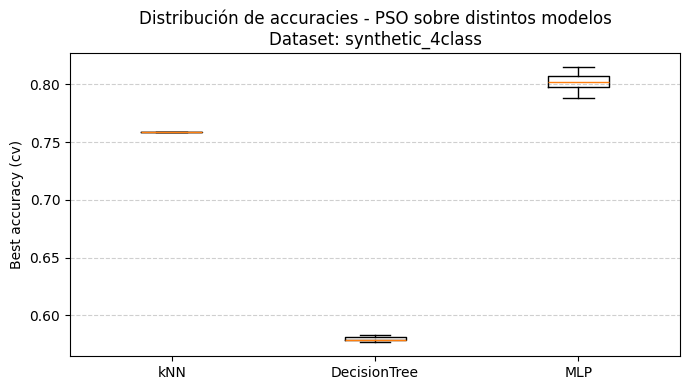

/tmp/ipykernel_14012/21212394.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


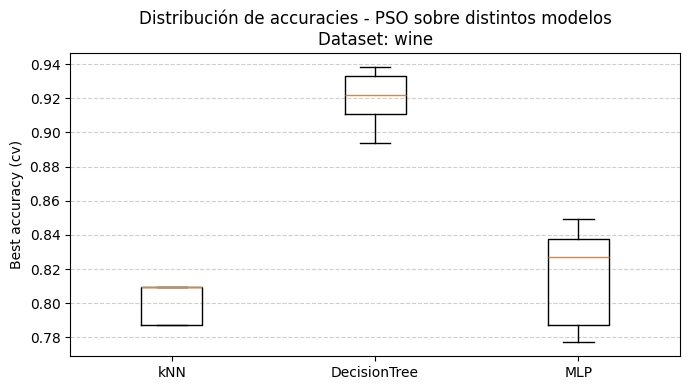

/tmp/ipykernel_14012/21212394.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


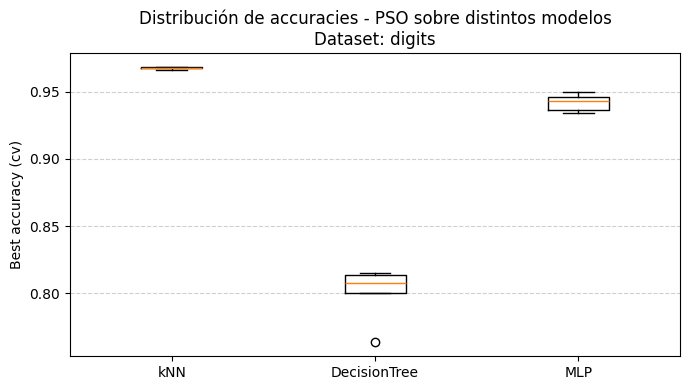

In [ ]:
for (X, y, ds_name) in datasets:
    df_ds = df_all_runs[df_all_runs["Dataset"] == ds_name]

    plt.figure(figsize=(7, 4))
    data_to_plot = []
    labels = []

    for model_cls, model_name in models:
        accs = df_ds[df_ds["Modelo"] == model_name]["BestAccuracy"].values
        if len(accs) > 0:
            data_to_plot.append(accs)
            labels.append(model_name)

    plt.boxplot(data_to_plot, labels=labels)
    plt.ylabel("Best accuracy (cv)")
    plt.title(f"Distribución de accuracies - PSO sobre distintos modelos\nDataset: {ds_name}")
    plt.grid(True, axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

A continuación, comparo PSO frente a Random Search y Bayesian Optimization para kNN con los 3 datasets

Running benchmark for kNN on synthetic_4class
[PSO] Iter 1/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 2/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 1/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 2/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 3/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 3/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 4/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 4/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 5/15 - Best fitness: 0.2415 - Best global position: [11.28598482  1.37560239  0.52270219]
[PSO] Iter 5/15 - Best fitness: 0.2415 - Best

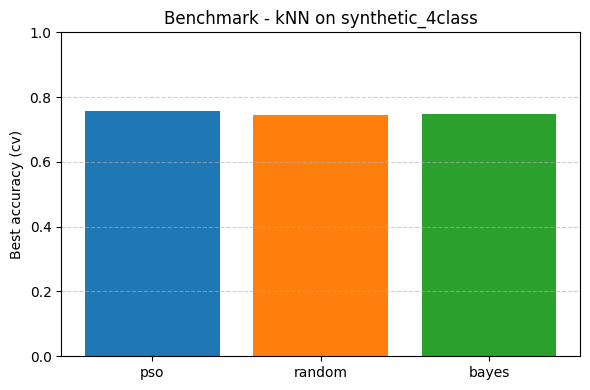

Running benchmark for kNN on wine
[PSO] Iter 1/15 - Best fitness: 0.2186 - Best global position: [3.14638452 1.30857898 0.68304895]
[PSO] Iter 2/15 - Best fitness: 0.2186 - Best global position: [3.14638452 1.30857898 0.68304895]
[PSO] Iter 1/15 - Best fitness: 0.2186 - Best global position: [3.14638452 1.30857898 0.68304895]
[PSO] Iter 2/15 - Best fitness: 0.2186 - Best global position: [3.14638452 1.30857898 0.68304895]
[PSO] Iter 3/15 - Best fitness: 0.1906 - Best global position: [1.         1.02907339 0.6101732 ]
[PSO] Iter 4/15 - Best fitness: 0.1906 - Best global position: [1.         1.02907339 0.6101732 ]
[PSO] Iter 3/15 - Best fitness: 0.1906 - Best global position: [1.         1.02907339 0.6101732 ]
[PSO] Iter 4/15 - Best fitness: 0.1906 - Best global position: [1.         1.02907339 0.6101732 ]
[PSO] Iter 5/15 - Best fitness: 0.1906 - Best global position: [1.         1.02907339 0.6101732 ]
[PSO] Iter 6/15 - Best fitness: 0.1906 - Best global position: [1.         1.0290733

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1), np.int64(1), np.int64(1)] before, using random point [np.int64(32), np.int64(3), np.int64(0)]
  warnings.warn(


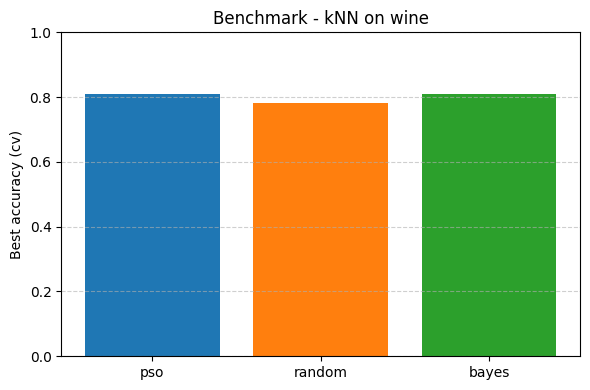

Running benchmark for kNN on digits
[PSO] Iter 1/15 - Best fitness: 0.0384 - Best global position: [8.57177244 2.54139605 0.82534568]
[PSO] Iter 1/15 - Best fitness: 0.0384 - Best global position: [8.57177244 2.54139605 0.82534568]
[PSO] Iter 2/15 - Best fitness: 0.0356 - Best global position: [1.71177244 2.26139605 0.77790286]
[PSO] Iter 2/15 - Best fitness: 0.0356 - Best global position: [1.71177244 2.26139605 0.77790286]
[PSO] Iter 3/15 - Best fitness: 0.0339 - Best global position: [3.11434241 2.14159605 0.84136965]
[PSO] Iter 3/15 - Best fitness: 0.0339 - Best global position: [3.11434241 2.14159605 0.84136965]
[PSO] Iter 4/15 - Best fitness: 0.0328 - Best global position: [3.85721005 2.30499674 0.74300262]
[PSO] Iter 4/15 - Best fitness: 0.0328 - Best global position: [3.85721005 2.30499674 0.74300262]
[PSO] Iter 5/15 - Best fitness: 0.0328 - Best global position: [3.85721005 2.30499674 0.74300262]
[PSO] Iter 5/15 - Best fitness: 0.0328 - Best global position: [3.85721005 2.30499

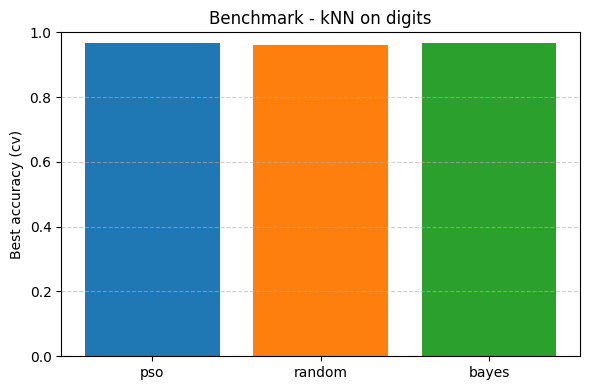

In [ ]:
from experiments import benchmark

benchmark_results = []
for (X, y, ds_name) in datasets:
    print(f"Running benchmark for kNN on {ds_name}")
    df, details = benchmark(KNNWrapper, X, y, model_name="kNN", dataset_name=ds_name, 
                            pso_config=dict(num_particles=10, max_iter=15, random_state=42),
                            baselines_to_run=["pso", "random", "bayes"],
                            baseline_budget=15,
                            random_state=42)
    print(df)
    benchmark_results.append((ds_name, df, details))

    # Simple comparison plot
    plt.figure(figsize=(6, 4))
    methods = df['method'].values
    accs = df['best_accuracy'].values
    plt.bar(methods, accs, color=['C0', 'C1', 'C2'][:len(methods)])
    plt.ylim(0, 1)
    plt.ylabel('Best accuracy (cv)')
    plt.title(f'Benchmark - kNN on {ds_name}')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

A continuación, se corren 3 ejecuciones de cada combinación de modelo-dataset usando un algoritmo de búsqueda de hiperparámetros distinto (PSO, Random Search y Bayesiano).

In [ ]:
from baselines import SKOPT_AVAILABLE

N_REPEATS = 3
baseline_budget = 10
pso_config_demo = dict(num_particles=8, max_iter=10, random_state=42)

rows = []
for (X, y, ds_name) in datasets:
    for model_cls, model_name in models:
        for run_id in range(N_REPEATS):
            seed = 1000 + run_id
            print(f"Running: dataset={ds_name}, model={model_name}, run={run_id+1}/{N_REPEATS}")
            baselines_to_run = ["pso", "random"] + (["bayes"] if SKOPT_AVAILABLE else [])

            df_res, details = benchmark(model_cls, X, y, model_name=model_name, dataset_name=ds_name,
                                        pso_config={**pso_config_demo, "random_state": seed},
                                        baselines_to_run=baselines_to_run,
                                        baseline_budget=baseline_budget,
                                        random_state=seed
                                        )

            for r in details:
                rows.append({
                    "dataset": ds_name,
                    "model": model_name,
                    "method": r["method"],
                    "run": run_id,
                    "best_accuracy": r["best_accuracy"],
                    "best_fitness": r["best_fitness"],
                    "runtime": r["runtime"],
                })

df_bench = pd.DataFrame(rows)
df_bench

Running: dataset=synthetic_4class, model=kNN, run=1/3
[PSO] Iter 1/10 - Best fitness: 0.2520 - Best global position: [10.30301319  2.96799116  0.66999717]
[PSO] Iter 1/10 - Best fitness: 0.2520 - Best global position: [10.30301319  2.96799116  0.66999717]
[PSO] Iter 2/10 - Best fitness: 0.2470 - Best global position: [9.34492141 1.9630956  0.62055507]
[PSO] Iter 2/10 - Best fitness: 0.2470 - Best global position: [9.34492141 1.9630956  0.62055507]
[PSO] Iter 3/10 - Best fitness: 0.2470 - Best global position: [9.34492141 1.9630956  0.62055507]
[PSO] Iter 3/10 - Best fitness: 0.2470 - Best global position: [9.34492141 1.9630956  0.62055507]
[PSO] Iter 4/10 - Best fitness: 0.2420 - Best global position: [9.75653076 2.28778272 0.68550359]
[PSO] Iter 4/10 - Best fitness: 0.2420 - Best global position: [9.75653076 2.28778272 0.68550359]
[PSO] Iter 5/10 - Best fitness: 0.2420 - Best global position: [9.75653076 2.28778272 0.68550359]
[PSO] Iter 5/10 - Best fitness: 0.2420 - Best global posit

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/10 - Best fitness: 0.2290 - Best global position: [38.6235751  -0.26121666 -2.10615355]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 2/10 - Best fitness: 0.2200 - Best global position: [45.49099919  0.31391165 -2.36748886]
[PSO] Iter 3/10 - Best fitness: 0.2200 - Best global position: [45.49099919  0.31391165 -2.36748886]
[PSO] Iter 3/10 - Best fitness: 0.2200 - Best global position: [45.49099919  0.31391165 -2.36748886]
[PSO] Iter 4/10 - Best fitness: 0.2200 - Best global position: [45.49099919  0.31391165 -2.36748886]
[PSO] Iter 4/10 - Best fitness: 0.2200 - Best global position: [45.49099919  0.31391165 -2.36748886]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 5/10 - Best fitness: 0.2120 - Best global position: [61.86013259  0.22172454 -2.23076181]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 6/10 - Best fitness: 0.2095 - Best global position: [56.96154547  0.15887484 -2.14988254]
[PSO] Iter 7/10 - Best fitness: 0.2035 - Best global position: [61.61127215 -0.25861675 -1.99259508]
[PSO] Iter 7/10 - Best fitness: 0.2035 - Best global position: [61.61127215 -0.25861675 -1.99259508]
[PSO] Iter 8/10 - Best fitness: 0.2035 - Best global position: [61.61127215 -0.25861675 -1.99259508]
[PSO] Iter 8/10 - Best fitness: 0.2035 - Best global position: [61.61127215 -0.25861675 -1.99259508]
[PSO] Iter 9/10 - Best fitness: 0.2035 - Best global position: [61.61127215 -0.25861675 -1.99259508]
[PSO] Iter 9/10 - Best fitness: 0.2035 - Best global position: [61.61127215 -0.25861675 -1.99259508]
[PSO] Iter 10/10 - Best fitness: 0.2035 - Best global position: [61.61127215 -0.25861675 -1.99259508]

=== Resultados MLP en synthetic_4class ===
Mejores hiperparámetros: {'hidden_layer_sizes': (62,), 'alpha': np.float64(0.5512939760844032), 'learning_rate_init': np.float64(0.0101719663748817

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

Running: dataset=synthetic_4class, model=MLP, run=2/3


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/10 - Best fitness: 0.2330 - Best global position: [72.19608812 -3.67149168 -2.57009261]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 2/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 3/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 3/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 4/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 4/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 5/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 5/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 6/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 6/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.04643002]
[PSO] Iter 7/10 - Best fitness: 0.2195 - Best global position: [60.1232757  -3.04757418 -2.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

Running: dataset=synthetic_4class, model=MLP, run=3/3


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/10 - Best fitness: 0.2265 - Best global position: [41.17801015 -2.85686397 -1.75716305]
[PSO] Iter 2/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]
[PSO] Iter 2/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]
[PSO] Iter 3/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]
[PSO] Iter 3/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]
[PSO] Iter 4/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]
[PSO] Iter 4/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]
[PSO] Iter 5/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]
[PSO] Iter 5/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


[PSO] Iter 6/10 - Best fitness: 0.2190 - Best global position: [40.58908386 -0.81499027 -2.14529664]
[PSO] Iter 7/10 - Best fitness: 0.2130 - Best global position: [45.70133151 -1.05546957 -2.16836448]
[PSO] Iter 7/10 - Best fitness: 0.2130 - Best global position: [45.70133151 -1.05546957 -2.16836448]
[PSO] Iter 8/10 - Best fitness: 0.2130 - Best global position: [45.70133151 -1.05546957 -2.16836448]
[PSO] Iter 8/10 - Best fitness: 0.2130 - Best global position: [45.70133151 -1.05546957 -2.16836448]
[PSO] Iter 9/10 - Best fitness: 0.2130 - Best global position: [45.70133151 -1.05546957 -2.16836448]
[PSO] Iter 9/10 - Best fitness: 0.2130 - Best global position: [45.70133151 -1.05546957 -2.16836448]
[PSO] Iter 10/10 - Best fitness: 0.2130 - Best global position: [45.70133151 -1.05546957 -2.16836448]

=== Resultados MLP en synthetic_4class ===
Mejores hiperparámetros: {'hidden_layer_sizes': (46,), 'alpha': np.float64(0.08800967767212028), 'learning_rate_init': np.float64(0.006786338472232

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

Running: dataset=wine, model=kNN, run=1/3
[PSO] Iter 1/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 2/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 1/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 2/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 3/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 4/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 3/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 4/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 5/10 - Best fitness: 0.2129 - Best global position: [14.73875867  1.40782647  0.62506469]
[PSO] Iter 6/10 - Best fitness: 0.2129 - Best glo

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/10 - Best fitness: 0.0634 - Best global position: [23.03645415  0.90397349 -1.9900085 ]
[PSO] Iter 2/10 - Best fitness: 0.0623 - Best global position: [49.05359719  1.         -2.05488201]
[PSO] Iter 2/10 - Best fitness: 0.0623 - Best global position: [49.05359719  1.         -2.05488201]
[PSO] Iter 3/10 - Best fitness: 0.0623 - Best global position: [49.05359719  1.         -2.05488201]
[PSO] Iter 3/10 - Best fitness: 0.0623 - Best global position: [49.05359719  1.         -2.05488201]
[PSO] Iter 4/10 - Best fitness: 0.0623 - Best global position: [49.05359719  1.         -2.05488201]
[PSO] Iter 4/10 - Best fitness: 0.0623 - Best global position: [49.05359719  1.         -2.05488201]
[PSO] Iter 5/10 - Best fitness: 0.0623 - Best global position: [49.05359719  1.         -2.05488201]
[PSO] Iter 5/10 - Best fitness: 0.0623 - Best global position: [49.05359719  1.         -2.05488201]
[PSO] Iter 6/10 - Best fitness: 0.0607 - Best global position: [48.40454966  0.40707151 -1.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

Running: dataset=digits, model=MLP, run=2/3


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/10 - Best fitness: 0.0818 - Best global position: [72.19608812 -3.67149168 -2.57009261]
[PSO] Iter 2/10 - Best fitness: 0.0751 - Best global position: [73.08118128 -3.54691321 -2.34338679]
[PSO] Iter 2/10 - Best fitness: 0.0751 - Best global position: [73.08118128 -3.54691321 -2.34338679]
[PSO] Iter 3/10 - Best fitness: 0.0701 - Best global position: [69.56083234 -3.63020733 -2.4158318 ]
[PSO] Iter 3/10 - Best fitness: 0.0701 - Best global position: [69.56083234 -3.63020733 -2.4158318 ]
[PSO] Iter 4/10 - Best fitness: 0.0690 - Best global position: [72.95458071 -2.89325094 -2.39565609]
[PSO] Iter 4/10 - Best fitness: 0.0690 - Best global position: [72.95458071 -2.89325094 -2.39565609]
[PSO] Iter 5/10 - Best fitness: 0.0690 - Best global position: [72.95458071 -2.89325094 -2.39565609]
[PSO] Iter 5/10 - Best fitness: 0.0690 - Best global position: [72.95458071 -2.89325094 -2.39565609]
[PSO] Iter 6/10 - Best fitness: 0.0690 - Best global position: [72.95458071 -2.89325094 -2.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

Running: dataset=digits, model=MLP, run=3/3


/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

[PSO] Iter 1/10 - Best fitness: 0.0890 - Best global position: [42.00173231 -2.97721288 -2.33531641]
[PSO] Iter 2/10 - Best fitness: 0.0885 - Best global position: [41.75296237 -0.83913267 -2.37702869]
[PSO] Iter 2/10 - Best fitness: 0.0885 - Best global position: [41.75296237 -0.83913267 -2.37702869]
[PSO] Iter 3/10 - Best fitness: 0.0773 - Best global position: [44.43650818 -1.67913267 -1.99083932]
[PSO] Iter 3/10 - Best fitness: 0.0773 - Best global position: [44.43650818 -1.67913267 -1.99083932]
[PSO] Iter 4/10 - Best fitness: 0.0740 - Best global position: [41.20661767 -1.74362135 -1.65091463]
[PSO] Iter 4/10 - Best fitness: 0.0740 - Best global position: [41.20661767 -1.74362135 -1.65091463]
[PSO] Iter 5/10 - Best fitness: 0.0740 - Best global position: [41.20661767 -1.74362135 -1.65091463]
[PSO] Iter 5/10 - Best fitness: 0.0740 - Best global position: [41.20661767 -1.74362135 -1.65091463]
[PSO] Iter 6/10 - Best fitness: 0.0740 - Best global position: [41.20661767 -1.74362135 -1.

/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tmonreal/Documents/PSO_Hyperparameter_Tuning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimiz

,dataset,model,method,run,best_accuracy,best_fitness,runtime
0,synthetic_4class,kNN,pso,0,0.758500,0.241500,6.039041
1,synthetic_4class,kNN,random,0,0.748000,0.252000,1.210398
2,synthetic_4class,kNN,bayes,0,0.739000,0.261000,1.840660
3,synthetic_4class,kNN,pso,1,0.758500,0.241500,2.011300
4,synthetic_4class,kNN,random,1,0.752500,0.247500,0.719011
...,...,...,...,...,...,...,...
76,digits,MLP,random,1,0.901518,0.098482,6.167221
77,digits,MLP,bayes,1,0.933230,0.066770,4.084006
78,digits,MLP,pso,2,0.932674,0.067326,10.271991
79,digits,MLP,random,2,0.904873,0.095127,5.798706


Visualizamos variabilidad utilizando boxplots para comparar cada algorítmo de búsqueda por dataset

/tmp/ipykernel_14012/2081150690.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=methods, patch_artist=True)


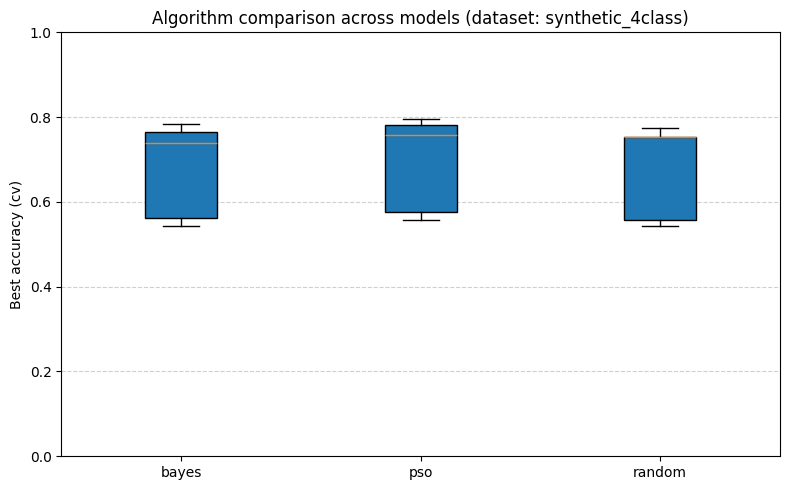

/tmp/ipykernel_14012/2081150690.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=methods, patch_artist=True)


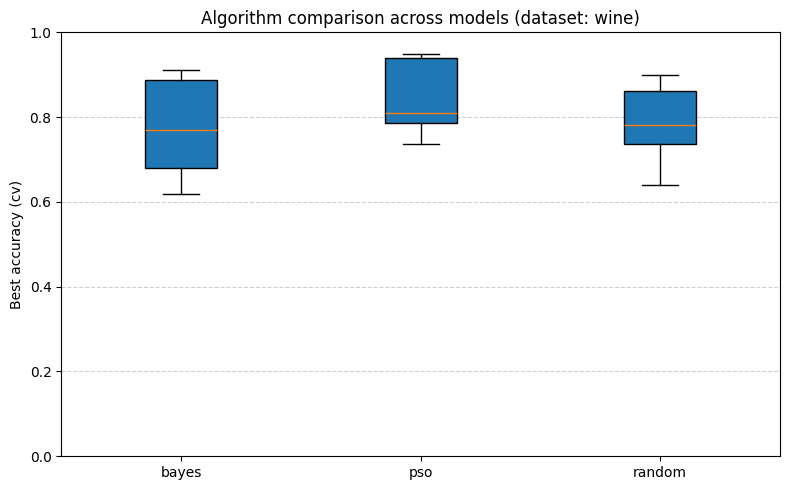

/tmp/ipykernel_14012/2081150690.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=methods, patch_artist=True)


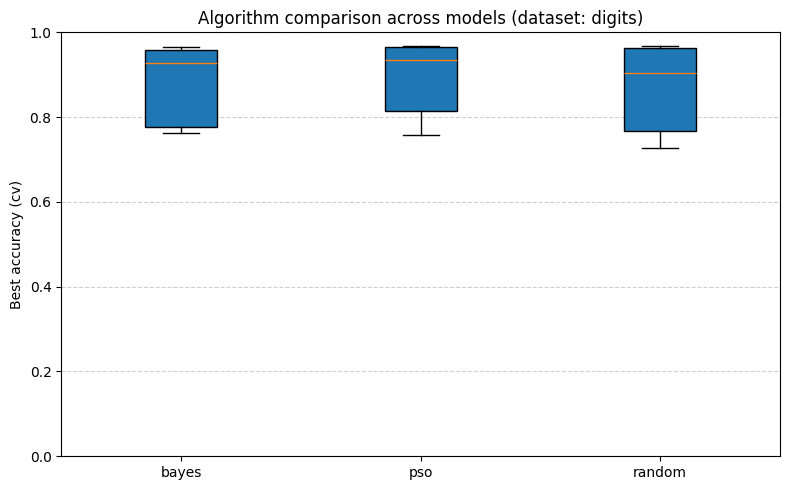

In [ ]:
for ds_name in df_bench['dataset'].unique():
    df_ds = df_bench[df_bench['dataset'] == ds_name]
    methods = sorted(df_ds['method'].unique())
    data_to_plot = [df_ds[df_ds['method'] == m]['best_accuracy'].values for m in methods]

    plt.figure(figsize=(8, 5))
    plt.boxplot(data_to_plot, labels=methods, patch_artist=True)
    plt.ylim(0, 1)
    plt.ylabel('Best accuracy (cv)')
    plt.title(f'Algorithm comparison across models (dataset: {ds_name})')
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

Visualizamos variabilidad utilizando boxplots para comparar cada algorítmo de búsqueda por modelo

/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)
/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)
/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)
/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.b

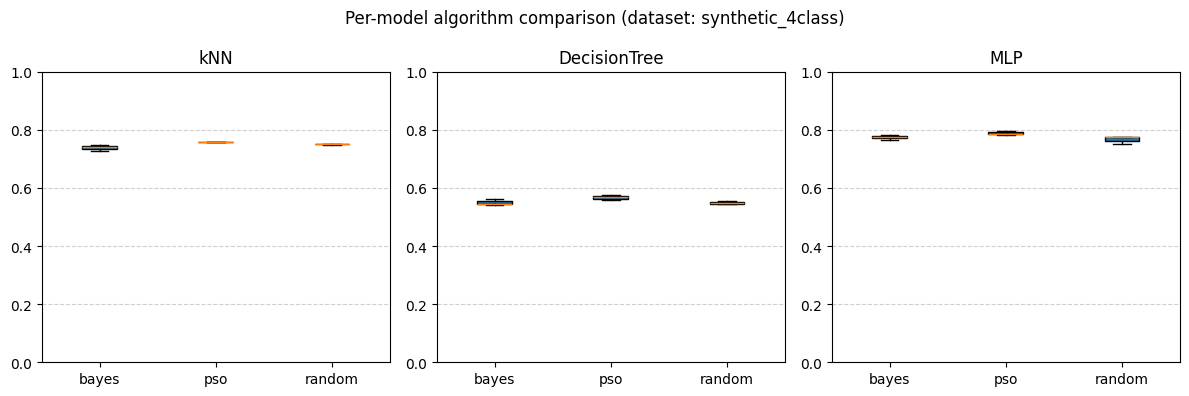

/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)
/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)
/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)


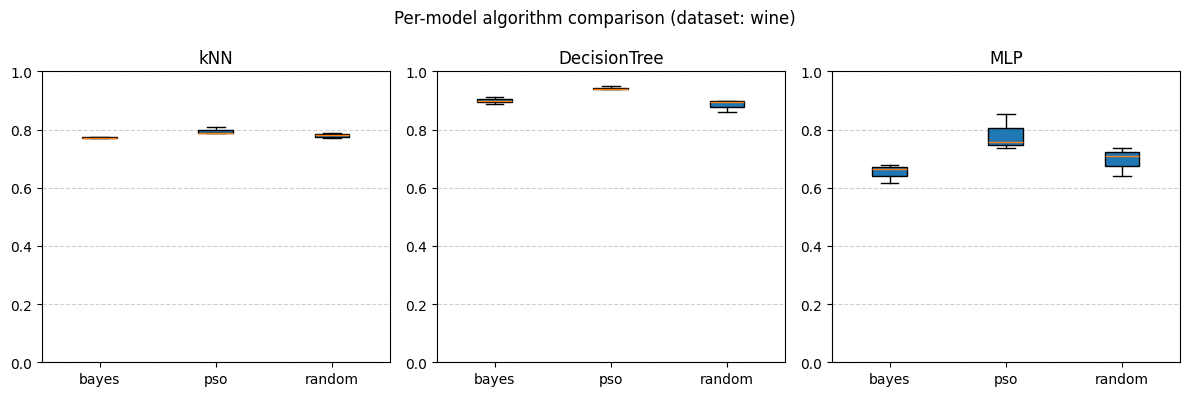

/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)
/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)
/tmp/ipykernel_14012/4142536027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=methods, patch_artist=True)


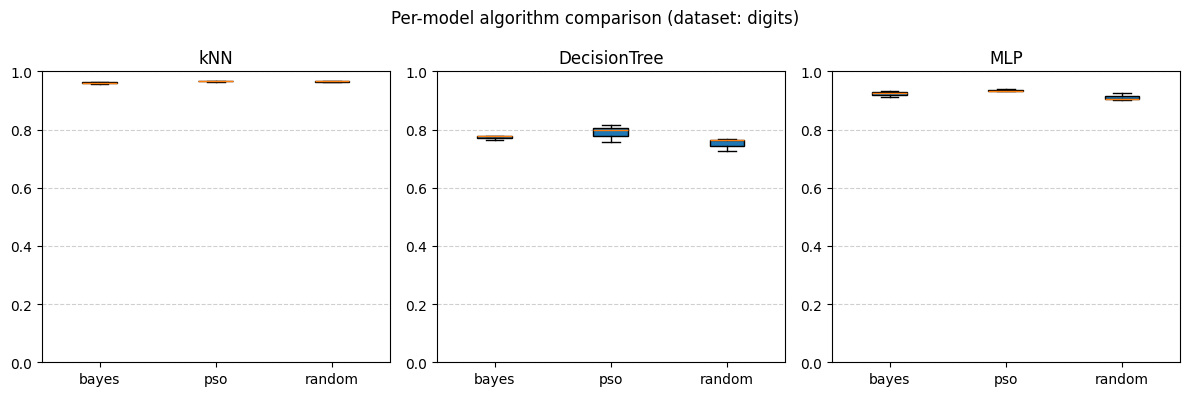

In [ ]:
for ds_name in df_bench['dataset'].unique():
    df_ds = df_bench[df_bench['dataset'] == ds_name]
    model_names = df_ds['model'].unique()
    n = len(model_names)
    fig, axes = plt.subplots(1, n, figsize=(4 * n, 4), squeeze=False)

    for i, model_name in enumerate(model_names):
        ax = axes[0, i]
        df_model = df_ds[df_ds['model'] == model_name]
        methods = sorted(df_model['method'].unique())
        data = [df_model[df_model['method'] == m]['best_accuracy'].values for m in methods]
        if len(data) == 0:
            continue
        ax.boxplot(data, labels=methods, patch_artist=True)
        ax.set_ylim(0, 1)
        ax.set_title(f'{model_name}')
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    fig.suptitle(f'Per-model algorithm comparison (dataset: {ds_name})')
    plt.tight_layout()
    plt.show()

Para hacer comparaciones más rigurosas, deberia aumentar el hiperparámetro de `N_REPEATS`, budgets y hacer tests estadísticos como Wilcoxon para evaluar significancia.